In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from allen_v1dd.stimulus_analysis import analysis_tools as at
from allen_v1dd.stimulus_analysis.analysis_tools import iter_plane_groups
from allen_v1dd.stimulus_analysis.drifting_gratings import load_dg_xarray_from_h5

at.set_stylesheet()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
at.set_analysis_file("/Users/chase/Desktop/stimulus_analyses_v2.h5")
# at.set_included_mice([409828])
at.set_included_columns([2, 3, 4, 5])

Text(0, 0.5, 'ROI count')

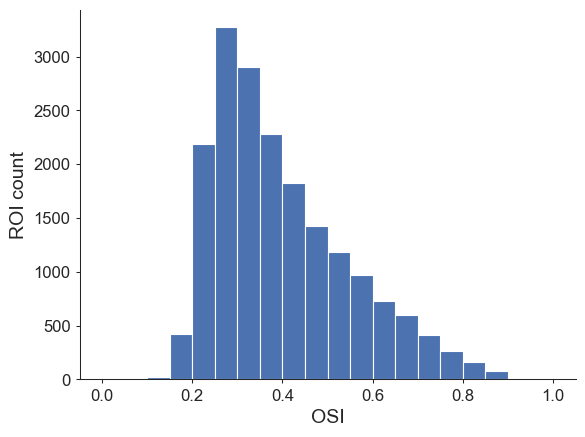

In [23]:
dgw_osi_perm_test = []

for group in iter_plane_groups():
    dgw = group["drifting_gratings_windowed"]
    inclusion = group["is_roi_valid"][()] & ~group["is_ignored_duplicate"][()]
    osi = dgw["osi_perm_test"] # 1st col = OSI, 2nd col = p values
    dgw_osi_perm_test.extend(osi[inclusion & (osi[:, 1] < 0.05), 0])

plt.hist(dgw_osi_perm_test, bins=np.arange(0, 1.05, 0.05))
plt.xlabel("OSI")
plt.ylabel("ROI count")

# Plot mean SSI using centered RF as inclusion

20217


Text(0, 0.5, 'ROI count')

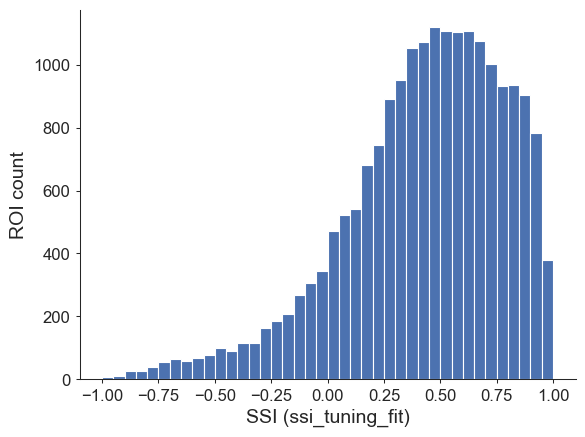

In [69]:
# ssi_metric = "ssi_avg_at_pref_sf"
ssi_metric = "ssi_tuning_fit"
ssi = []

for group in iter_plane_groups():
    dgw = group["drifting_gratings_windowed"]
    dgf = group["drifting_gratings_full"]
    inclusion = group["is_roi_valid"][()] & ~group["is_ignored_duplicate"][()]

    lsn = group["locally_sparse_noise"]

    has_on = lsn["is_responsive"][:, 0]
    on_dist = np.linalg.norm(lsn["rf_centers"][:, 0], axis=1)
    has_off = lsn["is_responsive"][:, 1]
    off_dist = np.linalg.norm(lsn["rf_centers"][:, 1], axis=1)
    r = 10
    # inclusion = inclusion & (~has_on | (on_dist < r))
    # inclusion = inclusion & ((has_on & (on_dist < r)) | (has_off & (off_dist < r)))

    # inclusion = inclusion & (dgw["is_responsive"])# & dgf["is_responsive"]
    
    inclusion = inclusion & ((dgw["dsi_perm_test"][:, 1] < 0.05) | (dgf["dsi_perm_test"][:, 1] < 0.05))

    ssi.extend(group["ssi"][ssi_metric][inclusion])

print(len(ssi))
plt.hist(ssi, bins=np.arange(-1, 1.05, 0.05))
plt.xlabel(f"SSI ({ssi_metric})")
plt.ylabel("ROI count")